install mlflow

In [27]:
pip install mlflow

import libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import joblib

Load the dataset and read it

In [37]:
mlflow.end_run()

In [38]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")
df.info()
df.describe()
df.head()
df.tail()
df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

227838

Drop unnecessary columns

In [39]:
df = df.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'])

Encode categorical features

In [40]:
categorical_columns = ['Sex', 'Blood Pressure', 'Diet']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Normalize numerical features

In [41]:
numerical_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
                      'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Separate features and target


In [42]:
X = df.drop(columns=['Heart Attack Risk'], axis=1)
y = df['Heart Attack Risk']

Split the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MLflow

In [44]:
mlflow.start_run(run_name="KNN Experiment")

<ActiveRun: >

Train the KNN model

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make predictions

In [46]:
y_pred = knn.predict(X_test)

evaluation metrics

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", zero_division=1)
recall = recall_score(y_test, y_pred, average="binary", zero_division=1)
f1 = f1_score(y_test, y_pred, average="binary")

Log model parameters

In [48]:
mlflow.log_param("n_neighbors", 5)

5

Log metrics

In [49]:
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("precision", precision)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1)

Log the trained model

In [50]:
mlflow.sklearn.log_model(knn, "knn_model")

2025/01/25 14:23:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


print them

In [51]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.57843696520251
Precision: 0.37583892617449666
Recall: 0.267515923566879
F1 Score: 0.3125581395348837


Confusion matrix

In [52]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[846 279]
 [460 168]]


show the confusion matrix

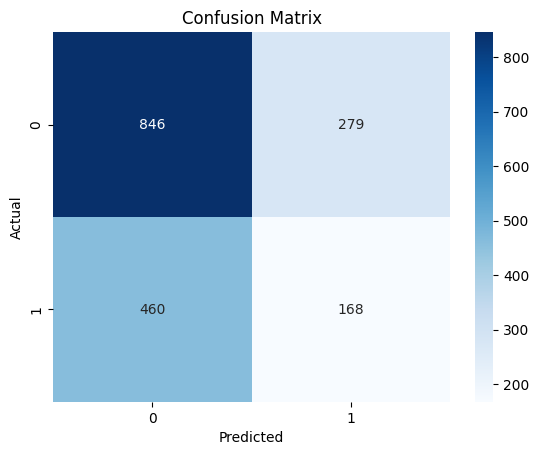

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Save the model locally





In [54]:
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

Log the model as an artifact


In [55]:
mlflow.log_artifact("knn_model.pkl")

Log confusion matrix as an artifact

In [56]:
plt.savefig("confusion_matrix.png")
mlflow.log_artifact("confusion_matrix.png")

<Figure size 640x480 with 0 Axes>

End the MLflow run

In [57]:
mlflow.end_run()